In [73]:
## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)


In [74]:
df_movies = pd.read_csv('datasets/to_use/movies_cleaned.csv')

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_movies.head())

,Unnamed: 0,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,producer,composer,cinematographer,editor,year,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genre_nan,(Banned),13+,15,16+,18+,ADV,ADV16,AO,All,Approved,E,E10+,F,G,GA,GP,K-A,M,M/PG,M18,MA-13,MA-17,NC-16,NC-17,NC16,Open,PG,PG-13,PG13,Passed,R,R(A),R21,T,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins,budget_bins
0,0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,2.888450e+07,United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']","['Liz Glotzer,David V. Lester,Niki Marvin']",['Thomas Newman'],['Roger Deakins'],['Richard Francis-Bruce'],1990.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,318,super_high,medium
1,1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,1.006234e+09,"United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...","['Kevin de la Noy,Jordan Goldberg,Philip Lee,B...","['James Newton Howard,Hans Zimmer']",['Wally Pfister'],['Lee Smith'],2000.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58559,super_high,high end
2,2,Inception (2010),150.0,8.8,2400000.0,173728000.0,8.368481e+08,"United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],"['Zakaria Alaoui,John Bernard,Chris Brigham,Jo...",['Hans Zimmer'],['Wally Pfister'],['Lee Smith'],2000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79132,super_high,high end
3,3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,1.012097e+08,"Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']","['Ross Grayson Bell,Ceán Chaffin,John S. Dorse...","['Dust Brothers,John King,Michael Simpson']",['Jeff Cronenweth'],['James Haygood'],1990.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2959,super_high,high end
4,4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,2.139288e+08,United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...","['Lawrence Bender,Danny DeVito,Richard N. Glad...",['nan'],['Andrzej Sekula'],['Sally Menke'],1990.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,296,super_high,tier 2 low


In [76]:
df_movies.drop('Unnamed: 0', axis=1, inplace=True)

In [77]:
df_movies_original = df_movies.copy()

In [78]:
df_movies = df_movies_original[['movieId']]

In [79]:
genres_and_certs_columns = df_movies_original.iloc[:,15:91]
genres_and_certs_columns
df_movies = df_movies.join(genres_and_certs_columns)

In [80]:
num_rating_columns = pd.get_dummies(df_movies_original.num_of_rating_bins, prefix='num_rating')
print(num_rating_columns.head())
df_movies = df_movies.join(num_rating_columns)

   num_rating_high  num_rating_low  num_rating_medium  num_rating_super_high  \
0                0               0                  0                      1   
1                0               0                  0                      1   
2                0               0                  0                      1   
3                0               0                  0                      1   
4                0               0                  0                      1   

   num_rating_super_low  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


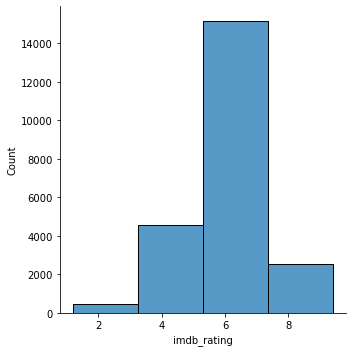

In [81]:
import seaborn as sns
sns.displot(df_movies_original[df_movies_original.imdb_rating < 10], x="imdb_rating", bins=4)

In [82]:
df_movies['imdb_rating_bins'] = pd.cut(x=df_movies_original['imdb_rating'], bins= [0, 2.5, 5, 7.5, 10], labels= ["low", "medium", "high", "super_high"])

In [83]:
imdb_rating_columns = pd.get_dummies(df_movies.imdb_rating_bins, prefix='imdb_rating')
print(imdb_rating_columns.head())
df_movies = df_movies.join(imdb_rating_columns)

   imdb_rating_low  imdb_rating_medium  imdb_rating_high  \
0                0                   0                 0   
1                0                   0                 0   
2                0                   0                 0   
3                0                   0                 0   
4                0                   0                 0   

   imdb_rating_super_high  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  


In [84]:
df_movies = df_movies.drop('imdb_rating_bins', axis=1)

In [85]:
df_movies

,movieId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,certificate_nan,num_rating_high,num_rating_low,num_rating_medium,num_rating_super_high,num_rating_super_low,imdb_rating_low,imdb_rating_medium,imdb_rating_high,imdb_rating_super_high
0,318,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,58559,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,79132,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2959,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,296,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22691,120134,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
22692,113682,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
22693,150064,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
22694,150944,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [86]:
obj = df_movies.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

movieId , 0
Action , 0
Adult , 0
Adventure , 0
Animation , 0
Biography , 0
Comedy , 0
Crime , 0
Documentary , 0
Drama , 0
Family , 0
Fantasy , 0
Film-Noir , 0
Game-Show , 0
History , 0
Horror , 0
Music , 0
Musical , 0
Mystery , 0
News , 0
Reality-TV , 0
Romance , 0
Sci-Fi , 0
Short , 0
Sport , 0
Talk-Show , 0
Thriller , 0
War , 0
Western , 0
genre_nan , 0
(Banned) , 0
13+ , 0
15 , 0
16+ , 0
18+ , 0
ADV , 0
ADV16 , 0
AO , 0
All , 0
Approved , 0
E , 0
E10+ , 0
F , 0
G , 0
GA , 0
GP , 0
K-A , 0
M , 0
M/PG , 0
M18 , 0
MA-13 , 0
MA-17 , 0
NC-16 , 0
NC-17 , 0
NC16 , 0
Open , 0
PG , 0
PG-13 , 0
PG13 , 0
Passed , 0
R , 0
R(A) , 0
R21 , 0
T , 0
TV-13 , 0
TV-14 , 0
TV-G , 0
TV-MA , 0
TV-PG , 0
TV-Y , 0
TV-Y7 , 0
TV-Y7-FV , 0
U/A , 0
Unrated , 0
X , 0
Not Rated , 0
certificate_nan , 0
num_rating_high , 0
num_rating_low , 0
num_rating_medium , 0
num_rating_super_high , 0
num_rating_super_low , 0
imdb_rating_low , 0
imdb_rating_medium , 0
imdb_rating_high , 0
imdb_rating_super_high , 0


C:\Users\Kevan\AppData\Local\Temp/ipykernel_12528/2633059500.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


In [87]:
df_ratings = pd.read_csv('datasets/to_use/ratings_cleaned.csv')

In [88]:
df_ratings['rating'].value_counts()

4.0    3623338
3.0    2571345
5.0    2060912
3.5    1716928
4.5    1244365
2.0     846076
2.5     667038
1.0     389996
1.5     208332
0.5     195839
Name: rating, dtype: int64

In [89]:
df_ratings.head(10)

,Unnamed: 0,userId,movieId,rating
0,22682008,147413,1,3.5
1,15931427,103254,1,3.0
2,785756,5320,1,5.0
3,185481,1317,1,3.0
4,4523672,29725,1,3.5
5,18774539,121730,1,3.5
6,9629051,62518,1,5.0
7,23320318,151375,1,4.0
8,3411247,22505,1,5.0
9,18774745,121734,1,5.0


In [90]:
df_ratings.drop('Unnamed: 0', axis=1, inplace=True)

In [91]:
# scale rating to 0-1 also
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_ratings[['rating']] = scaler.fit_transform(df_ratings[['rating']])

In [92]:
df_ratings

,userId,movieId,rating
0,147413,1,0.666667
1,103254,1,0.555556
2,5320,1,1.000000
3,1317,1,0.555556
4,29725,1,0.666667
...,...,...,...
13524164,39183,208941,0.555556
13524165,92412,208943,0.333333
13524166,84238,209041,0.555556
13524167,15152,209053,0.666667


# start of Algo

In [93]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

2.11.0
2.11.0


In [94]:
#drop columns with null values and drop title also
# df_movies.dropna(axis=1,inplace=True)
# df_movies.drop('title', axis=1, inplace=True)

In [95]:
df_movies.count()

movieId                   22696
Action                    22696
Adult                     22696
Adventure                 22696
Animation                 22696
                          ...  
num_rating_super_low      22696
imdb_rating_low           22696
imdb_rating_medium        22696
imdb_rating_high          22696
imdb_rating_super_high    22696
Length: 86, dtype: int64

In [96]:
df_ratings.count()

userId     13524169
movieId    13524169
rating     13524169
dtype: int64

In [97]:
df_movies = df_movies[df_movies['movieId'].isin(df_ratings['movieId'].tolist())]
df_ratings = df_ratings[df_ratings['movieId'].isin(df_movies['movieId'].tolist())]

In [98]:
df_movies.count()

movieId                   21527
Action                    21527
Adult                     21527
Adventure                 21527
Animation                 21527
                          ...  
num_rating_super_low      21527
imdb_rating_low           21527
imdb_rating_medium        21527
imdb_rating_high          21527
imdb_rating_super_high    21527
Length: 86, dtype: int64

In [99]:
df_ratings.count()

userId     13523560
movieId    13523560
rating     13523560
dtype: int64

In [100]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_movies.head())

,movieId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genre_nan,(Banned),13+,15,16+,18+,ADV,ADV16,AO,All,Approved,E,E10+,F,G,GA,GP,K-A,M,M/PG,M18,MA-13,MA-17,NC-16,NC-17,NC16,Open,PG,PG-13,PG13,Passed,R,R(A),R21,T,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,num_rating_high,num_rating_low,num_rating_medium,num_rating_super_high,num_rating_super_low,imdb_rating_low,imdb_rating_medium,imdb_rating_high,imdb_rating_super_high
0,318,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,58559,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,79132,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2959,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,296,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [101]:
df_ratings

,userId,movieId,rating
0,147413,1,0.666667
1,103254,1,0.555556
2,5320,1,1.000000
3,1317,1,0.555556
4,29725,1,0.666667
...,...,...,...
13524164,39183,208941,0.555556
13524165,92412,208943,0.333333
13524166,84238,209041,0.555556
13524167,15152,209053,0.666667


In [102]:
userId = 69

In [103]:
#STEP 1
    
movie_id_df = df_ratings.loc[df_ratings['userId']==userId]

# TRYING TRAIN TEST SPLIT HERE
ratings_train, ratings_test = train_test_split(movie_id_df, test_size = 0.2, random_state = 69)
print('----------- START OF TRAIN DATASET ----------------------')
print(ratings_train)
print(ratings_train.shape)
print('----------- END OF TRAIN DATASET ----------------------')
print()
print('----------- START OF TEST DATASET ----------------------')
print(ratings_test)
print(ratings_test.shape)
print('----------- END OF TEST DATASET ----------------------')
print()

----------- START OF TRAIN DATASET ----------------------
          userId  movieId    rating
3828560       69     1240  1.000000
840070        69      253  0.777778
6295077       69     2571  1.000000
9094644       69     5418  0.333333
9672241       69     6711  0.888889
...          ...      ...       ...
7287955       69     3147  0.777778
11139309      69    48516  1.000000
9267555       69     5903  0.555556
9362819       69     5989  0.777778
7126541       69     2997  0.555556

[80 rows x 3 columns]
(80, 3)
----------- END OF TRAIN DATASET ----------------------

----------- START OF TEST DATASET ----------------------
          userId  movieId    rating
11606958      69    59315  0.555556
4210621       69     1291  1.000000
1573970       69      454  0.222222
10116738      69     7438  1.000000
4582338       69     1527  0.111111
1239738       69      356  1.000000
3612217       69     1210  1.000000
11583545      69    58559  1.000000
11800819      69    64614  0.888889
93243

In [104]:
user_movies = df_movies[df_movies['movieId'].isin(ratings_train['movieId'].tolist())]
user_movies.set_index('movieId', inplace=True)
# print(user_movies)
print('----------- START OF ALL MOVIES THAT HAVE BEEN RATED BY USER X ----------------------')
print(user_movies)
print(user_movies.shape)
print('----------- END OF ALL MOVIES THAT HAVE BEEN RATED BY USER X ----------------------')

----------- START OF ALL MOVIES THAT HAVE BEEN RATED BY USER X ----------------------
         Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
movieId                                                                  
2959          0      0          0          0          0       0      0   
296           0      0          0          0          0       0      1   
2571          1      0          0          0          0       0      0   
4993          1      0          1          0          0       0      0   
3578          1      0          1          0          0       0      0   
...         ...    ...        ...        ...        ...     ...    ...   
1356          1      0          1          0          0       0      0   
4641          0      0          0          0          0       1      0   
4728          1      0          1          0          0       1      0   
1589          0      0          0          0          0       0      1   
481           0      0    

# break

In [105]:
df_movies.sort_values(by='movieId', inplace=True)
df_movies.reset_index(drop=True, inplace=True)
df_movies

C:\Users\Kevan\AppData\Local\Temp/ipykernel_12528/1934784959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.sort_values(by='movieId', inplace=True)


,movieId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,certificate_nan,num_rating_high,num_rating_low,num_rating_medium,num_rating_super_high,num_rating_super_low,imdb_rating_low,imdb_rating_medium,imdb_rating_high,imdb_rating_super_high
0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,4,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,8,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,14,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,208941,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
21523,208943,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
21524,209041,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21525,209053,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [106]:
df_movies_to_use = df_movies.copy()

In [107]:
df_movies_to_use

,movieId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,certificate_nan,num_rating_high,num_rating_low,num_rating_medium,num_rating_super_high,num_rating_super_low,imdb_rating_low,imdb_rating_medium,imdb_rating_high,imdb_rating_super_high
0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,4,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,8,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,14,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,208941,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
21523,208943,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
21524,209041,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21525,209053,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


break: exporting csv here

In [108]:
df_movies_to_use.to_csv('movies_cleaned_kev_cosine.csv', index=False)

In [36]:
df_movies.set_index('movieId', inplace=True)

In [37]:
df_movies

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,certificate_nan,num_rating_high,num_rating_low,num_rating_medium,num_rating_super_high,num_rating_super_low,imdb_rating_low,imdb_rating_medium,imdb_rating_high,imdb_rating_super_high
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
14,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208941,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
208943,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
209041,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [38]:
cosine_sim = cosine_similarity(df_movies)

In [39]:
cosine_sim

array([[1.        , 0.5       , 0.16666667, ..., 0.33333333, 0.20412415,
        0.        ],
       [0.5       , 1.        , 0.33333333, ..., 0.33333333, 0.20412415,
        0.        ],
       [0.16666667, 0.33333333, 1.        , ..., 0.16666667, 0.20412415,
        0.18257419],
       ...,
       [0.33333333, 0.33333333, 0.16666667, ..., 1.        , 0.40824829,
        0.18257419],
       [0.20412415, 0.20412415, 0.20412415, ..., 0.40824829, 1.        ,
        0.4472136 ],
       [0.        , 0.        , 0.18257419, ..., 0.18257419, 0.4472136 ,
        1.        ]])

In [40]:
cosine_sim[0]

array([1.        , 0.5       , 0.16666667, ..., 0.33333333, 0.20412415,
       0.        ])

In [41]:
movie_user_likes = "Pulp Fiction (1994)"
def get_index_from_title(title):
    return df_movies_original[df_movies_original.title == title]["movieId"].values[0]
movie_index = get_index_from_title(movie_user_likes) #get movieId
cosine_sim_index = df_movies_to_use.index[df_movies_to_use['movieId'] == movie_index].values[0] #get 0-based index in cosine similarity array

In [42]:
print(movie_index)
print(cosine_sim_index)

296
143


In [43]:
similar_movies = list(enumerate(cosine_sim[cosine_sim_index]))

sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

sorted_similar_movies

[(6, 0.9999999999999999),
 (58, 0.9999999999999999),
 (143, 0.9999999999999999),
 (396, 0.9999999999999999),
 (560, 0.9999999999999999),
 (1049, 0.9999999999999999),
 (2000, 0.9999999999999999),
 (3522, 0.9999999999999999),
 (4909, 0.9999999999999999),
 (23, 0.9128709291752769),
 (202, 0.9128709291752769),
 (226, 0.9128709291752769),
 (274, 0.9128709291752769),
 (293, 0.9128709291752769),
 (308, 0.9128709291752769),
 (569, 0.9128709291752769),
 (660, 0.9128709291752769),
 (923, 0.9128709291752769),
 (977, 0.9128709291752769),
 (1442, 0.9128709291752769),
 (1467, 0.9128709291752769),
 (1871, 0.9128709291752769),
 (2247, 0.9128709291752769),
 (2616, 0.9128709291752769),
 (3270, 0.9128709291752769),
 (3273, 0.9128709291752769),
 (3560, 0.9128709291752769),
 (5135, 0.9128709291752769),
 (5151, 0.9128709291752769),
 (5351, 0.9128709291752769),
 (5473, 0.9128709291752769),
 (5628, 0.9128709291752769),
 (5650, 0.9128709291752769),
 (5689, 0.9128709291752769),
 (5690, 0.9128709291752769),
 (57

In [44]:
def get_title_from_index(index):
    movieId = df_movies_to_use.iloc[index]['movieId']
    return df_movies_original[df_movies_original.movieId == movieId]["title"].values[0]
i=0
for movie in sorted_similar_movies:
    if movie[0] == cosine_sim_index:
        continue
    print(get_title_from_index(movie[0]))
    i=i+1
    if i>=15:
        break

Casino (1995)
Taxi Driver (1976)
The Godfather (1972)
Once Upon a Time in America (1984)
American History X (1998)
Scarface (1983)
Dogville (2003)
Lord of War (2005)
The Usual Suspects (1995)
Carlito's Way (1993)
In the Name of the Father (1993)
True Romance (1993)
The Silence of the Lambs (1991)
Primal Fear (1996)
Miller's Crossing (1990)
